<a href="https://colab.research.google.com/github/sunspai1/ML_Code_Practise/blob/main/CIFAR_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

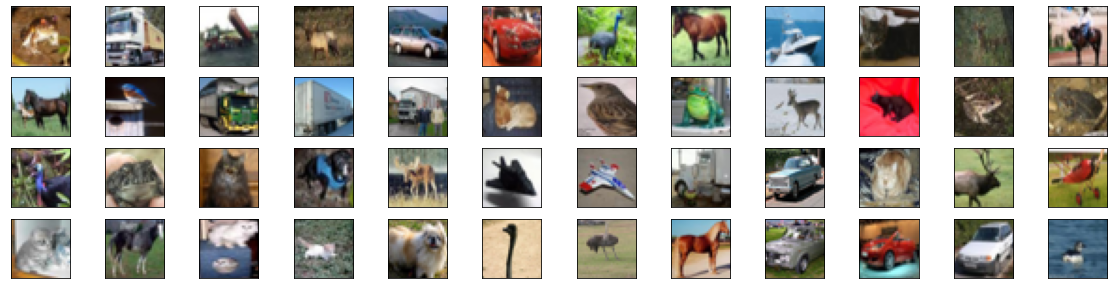

In [3]:
fig = plt.figure(figsize=(20,5))
for i in range(48):
  ax = fig.add_subplot(4, 12,i+1 , xticks=[],yticks=[] )
  ax.imshow(np.squeeze(x_train[i]))

In [4]:
x_train = x_train.astype('float32') /255
y_test = y_train.astype('float32') / 255

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [8]:
import tensorflow as tf
from keras.utils import np_utils

In [9]:
num_classes = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train,num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes)

In [10]:
#Split train dataset into validation dataset:

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [12]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath = 'model.weights.beat.hdfs5', verbose=1,save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=16, epochs=100, validation_data=(x_valid, y_valid), callbacks=[checkpointer],verbose=2,shuffle=True)

Epoch 1/100
2813/2813 - 55s - loss: 1.5379 - accuracy: 0.4442 - val_loss: 1.2393 - val_accuracy: 0.5616

Epoch 00001: val_loss improved from inf to 1.23933, saving model to model.weights.beat.hdfs5
INFO:tensorflow:Assets written to: model.weights.beat.hdfs5/assets
Epoch 2/100
2813/2813 - 11s - loss: 1.2467 - accuracy: 0.5569 - val_loss: 1.0847 - val_accuracy: 0.6178

Epoch 00002: val_loss improved from 1.23933 to 1.08471, saving model to model.weights.beat.hdfs5
INFO:tensorflow:Assets written to: model.weights.beat.hdfs5/assets
Epoch 3/100
2813/2813 - 11s - loss: 1.1795 - accuracy: 0.5909 - val_loss: 1.1121 - val_accuracy: 0.6142

Epoch 00003: val_loss did not improve from 1.08471
Epoch 4/100
2813/2813 - 11s - loss: 1.1752 - accuracy: 0.5949 - val_loss: 1.0276 - val_accuracy: 0.6476

Epoch 00004: val_loss improved from 1.08471 to 1.02763, saving model to model.weights.beat.hdfs5
INFO:tensorflow:Assets written to: model.weights.beat.hdfs5/assets
Epoch 5/100
2813/2813 - 10s - loss: 1.204